In [49]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast, GPT2Config

import torch
from torch.utils.data import Dataset
from tqdm import tqdm
from pathlib import Path
import numpy as np
from PIL import Image
import os

In [50]:
VOCAB_SIZE = 30000
MAX_LEN = 128

In [87]:
TOKENIZER_SAVEDIR = Path('/home/macosta/ttmp/primus-data/primus-agnostic/agnostic-tokenizer-split/')
LM_MODEL_SAVEDIR = Path('/home/macosta/ttmp/primus-models/gpt2-lm-agnostic-split/')
PRIMUS_TXT_FILES = Path('/home/macosta/ttmp/primus-data/primus-agnostic/agnostic/')

In [88]:
config = GPT2Config(
    vocab_size=VOCAB_SIZE,
    n_positions=MAX_LEN,
    n_head=12,
)

In [89]:
model = GPT2LMHeadModel(config=config).from_pretrained(str(LM_MODEL_SAVEDIR))

In [90]:
tokenizer = GPT2TokenizerFast.from_pretrained(TOKENIZER_SAVEDIR, max_len=MAX_LEN)

file /home/macosta/ttmp/primus-data/primus-agnostic/agnostic-tokenizer-split/config.json not found
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [91]:
files = os.listdir(PRIMUS_TXT_FILES)

In [92]:
tokenizer.encode("<pad>", return_tensors="pt")

tensor([[1]])

In [98]:
input_str = tokenizer.encode("<s> clef.C", return_tensors="pt")
output_tokens = model.generate(input_str, 
                               pad_token_id=1,
                               eos_token_id=2,
                               temperature=1,
                               max_length=128)[0]
output_tokens = tokenizer.decode(output_tokens).split()
print(' '.join(output_tokens))

<s> clef.C L1 accidental.flat L4 accidental.flat L2 accidental.flat S3 metersign.C L3 digit.1 S5 multirest L3 barline L1 rest.half L3 rest.quarter L3 rest.eighth L3 note.eighth L4 barline L1 note.quarter S5 dot S5 note.eighth L4 note.quarter L4 dot S4 note.eighth S5 barline L1 note.quarter L5 note.quarter L5 rest.quarter L3 rest.eighth L3 note.eighth L4 barline L1 note.quarter L6 dot S6 note.eighth S3 note.quarter S3 dot S3 note.eighth S4 barline L1 note.quarter S4 note.quarter L4 rest.quarter L3 </s>


In [64]:
def continue_image(file, seed_length=100, pred_length=500, max_len=128, show=True, show_original=True, temp=1):
    with open(file, 'r') as f:
        data = f.read()
    tokens = data.split()
    index = int(np.random.random()*(len(tokens) - seed_length))
    seed = tokens[index:index + seed_length]
    if show_original:
        tokens_to_image(seed).show()
    input_string = f"{' '.join(seed[-(max_len - 1):])}"
    inputs = tokenizer.encode(input_string, return_tensors="pt")
    output_tokens = model.generate(inputs, 
                                   min_length=seed_length, 
                                   max_length=max_len, 
                                   pad_token_id=50256,
                                   temperature=temp,
                                   num_beams=5)[0]
    output_tokens = tokenizer.decode(output_tokens).split()
    img = tokens_to_image(output_tokens)
    img.show()
    return img

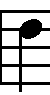

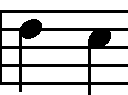

In [68]:
img = continue_image(PRIMUS_TXT_FILES / str(files[1]), seed_length=50, temp=10)